# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
np.random.seed(42)

# Loading + Splitting The Dataset

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f" Number of samples: {X.shape[0]}")
print(f" Number of features: {X.shape[1]}")

 Number of samples: 569
 Number of features: 30


In [4]:
print(f" Feature names: {feature_names}")

 Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(f" Target classes: {target_names}")

 Target classes: ['malignant' 'benign']


In [6]:
print(f"Class distribution: {np.bincount(y)}")
print(f"   - {target_names[0]}: {np.bincount(y)[0]} samples ({np.bincount(y)[0]/len(y)*100:.1f}%)")
print(f"   - {target_names[1]}: {np.bincount(y)[1]} samples ({np.bincount(y)[1]/len(y)*100:.1f}%)")

Class distribution: [212 357]
   - malignant: 212 samples (37.3%)
   - benign: 357 samples (62.7%)


In [7]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map({0: target_names[0], 1: target_names[1]})

print(df.head().T)

                                 0          1          2          3          4
mean radius                  17.99      20.57      19.69      11.42      20.29
mean texture                 10.38      17.77      21.25      20.38      14.34
mean perimeter               122.8      132.9      130.0      77.58      135.1
mean area                   1001.0     1326.0     1203.0      386.1     1297.0
mean smoothness             0.1184    0.08474     0.1096     0.1425     0.1003
mean compactness            0.2776    0.07864     0.1599     0.2839     0.1328
mean concavity              0.3001     0.0869     0.1974     0.2414      0.198
mean concave points         0.1471    0.07017     0.1279     0.1052     0.1043
mean symmetry               0.2419     0.1812     0.2069     0.2597     0.1809
mean fractal dimension     0.07871    0.05667    0.05999    0.09744    0.05883
radius error                 1.095     0.5435     0.7456     0.4956     0.7572
texture error               0.9053     0.7339     0.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)

print(f"Total samples: {total_samples}")
print(f"Training set: {train_samples} samples ({train_samples/total_samples*100:.1f}%)")
print(f"Test set: {test_samples} samples ({test_samples/total_samples*100:.1f}%)")

Total samples: 569
Training set: 398 samples (69.9%)
Test set: 171 samples (30.1%)


In [10]:
print("\nClass distribution in each set:")
print("Training set:")
print(f"  - {target_names[0]}: {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"  - {target_names[1]}: {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)")

print("\nTest set:")
print(f"  - {target_names[0]}: {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"  - {target_names[1]}: {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)")


Class distribution in each set:
Training set:
  - malignant: 148 (37.2%)
  - benign: 250 (62.8%)

Test set:
  - malignant: 64 (37.4%)
  - benign: 107 (62.6%)


# Data Preprocessing

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape after scaling: {X_train_scaled.shape}")
print(f"Test data shape after scaling: {X_test_scaled.shape}")

Training data shape after scaling: (398, 30)
Test data shape after scaling: (171, 30)


# Implementing CART Model + Evaluation

In [12]:
best_dt_accuracy = 0
best_dt_depth = 0
best_dt_model = None

for depth in range(1, 21):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_dt_accuracy:
        best_dt_accuracy = accuracy
        best_dt_depth = depth
        best_dt_model = dt
    
    print(f"Tree depth: {depth:2d} - Accuracy: {accuracy:.4f}")

print(f"\nBest Decision Tree model: depth {best_dt_depth}, accuracy {best_dt_accuracy:.4f}")

dt_model = best_dt_model
y_pred_dt = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("\nDecision Tree evaluation results on test data:")
print(f"  Accuracy:  {dt_accuracy:.4f}")
print(f"  Precision: {dt_precision:.4f}")
print(f"  Recall:    {dt_recall:.4f}")
print(f"  F1-score:  {dt_f1:.4f}")

Tree depth:  1 - Accuracy: 0.9123
Tree depth:  2 - Accuracy: 0.9181
Tree depth:  3 - Accuracy: 0.9240
Tree depth:  4 - Accuracy: 0.9240
Tree depth:  5 - Accuracy: 0.9298
Tree depth:  6 - Accuracy: 0.9181
Tree depth:  7 - Accuracy: 0.9181
Tree depth:  8 - Accuracy: 0.9181
Tree depth:  9 - Accuracy: 0.9181
Tree depth: 10 - Accuracy: 0.9181
Tree depth: 11 - Accuracy: 0.9181
Tree depth: 12 - Accuracy: 0.9181
Tree depth: 13 - Accuracy: 0.9181
Tree depth: 14 - Accuracy: 0.9181
Tree depth: 15 - Accuracy: 0.9181
Tree depth: 16 - Accuracy: 0.9181
Tree depth: 17 - Accuracy: 0.9181
Tree depth: 18 - Accuracy: 0.9181
Tree depth: 19 - Accuracy: 0.9181
Tree depth: 20 - Accuracy: 0.9181

Best Decision Tree model: depth 5, accuracy 0.9298

Decision Tree evaluation results on test data:
  Accuracy:  0.9298
  Precision: 0.9439
  Recall:    0.9439
  F1-score:  0.9439


In [13]:
print("CART Classification Report:")
print("-" * 30)
print(classification_report(y_test, y_pred_dt, target_names=target_names))

CART Classification Report:
------------------------------
              precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        64
      benign       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



# Implementing Random Forest + Evaluation

In [14]:
best_rf_accuracy = 0
best_rf_n_estimators = 0
best_rf_model = None

n_estimators_list = [10, 50, 100, 150, 200, 250, 300]

for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_rf_accuracy:
        best_rf_accuracy = accuracy
        best_rf_n_estimators = n_estimators
        best_rf_model = rf
    
    print(f"Number of trees: {n_estimators:3d} - Accuracy: {accuracy:.4f}")

print(f"\nBest Random Forest model: {best_rf_n_estimators} trees, accuracy {best_rf_accuracy:.4f}")

rf_model = best_rf_model
y_pred_rf = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\nRandom Forest evaluation results on test data:")
print(f"  Accuracy:  {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall:    {rf_recall:.4f}")
print(f"  F1-score:  {rf_f1:.4f}")

Number of trees:  10 - Accuracy: 0.9298
Number of trees:  50 - Accuracy: 0.9415
Number of trees: 100 - Accuracy: 0.9415
Number of trees: 150 - Accuracy: 0.9415
Number of trees: 200 - Accuracy: 0.9415
Number of trees: 250 - Accuracy: 0.9415
Number of trees: 300 - Accuracy: 0.9474

Best Random Forest model: 300 trees, accuracy 0.9474

Random Forest evaluation results on test data:
  Accuracy:  0.9474
  Precision: 0.9455
  Recall:    0.9720
  F1-score:  0.9585


In [15]:
print("Random Forest Classification Report:")
print("-" * 30)
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Random Forest Classification Report:
------------------------------
              precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        64
      benign       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# Implementing AdaBoosting with Low-depth Tree + Evaluation

In [16]:
best_ab_accuracy = 0
best_ab_n_estimators = 0
best_ab_model = None

base_estimator = DecisionTreeClassifier(max_depth=2, random_state=42)

for n_estimators in [10, 50, 100, 150, 200]:
    ab = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        random_state=42
    )
    ab.fit(X_train_scaled, y_train)
    y_pred = ab.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_ab_accuracy:
        best_ab_accuracy = accuracy
        best_ab_n_estimators = n_estimators
        best_ab_model = ab
    
    print(f"Number of estimators: {n_estimators:3d} - Accuracy: {accuracy:.4f}")

print(f"\nBest AdaBoost model: {best_ab_n_estimators} estimators, accuracy {best_ab_accuracy:.4f}")

ab_model = best_ab_model
y_pred_ab = ab_model.predict(X_test_scaled)

ab_accuracy = accuracy_score(y_test, y_pred_ab)
ab_precision = precision_score(y_test, y_pred_ab)
ab_recall = recall_score(y_test, y_pred_ab)
ab_f1 = f1_score(y_test, y_pred_ab)

print("\nAdaBoost evaluation results on test data:")
print(f"  Accuracy:  {ab_accuracy:.4f}")
print(f"  Precision: {ab_precision:.4f}")
print(f"  Recall:    {ab_recall:.4f}")
print(f"  F1-score:  {ab_f1:.4f}")

Number of estimators:  10 - Accuracy: 0.9357
Number of estimators:  50 - Accuracy: 0.9532
Number of estimators: 100 - Accuracy: 0.9532
Number of estimators: 150 - Accuracy: 0.9591
Number of estimators: 200 - Accuracy: 0.9591

Best AdaBoost model: 150 estimators, accuracy 0.9591

AdaBoost evaluation results on test data:
  Accuracy:  0.9591
  Precision: 0.9464
  Recall:    0.9907
  F1-score:  0.9680


In [17]:
print("AdaBoost Classification Report:")
print("-" * 30)
print(classification_report(y_test, y_pred_ab, target_names=target_names))

AdaBoost Classification Report:
------------------------------
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Implementing GBDT Model + Evaluation

In [18]:
best_gb_accuracy = 0
best_gb_lr = 0
best_gb_model = None

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]

for lr in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    gb.fit(X_train_scaled, y_train)
    y_pred = gb.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_gb_accuracy:
        best_gb_accuracy = accuracy
        best_gb_lr = lr
        best_gb_model = gb
    
    print(f"Learning rate: {lr:.3f} - Accuracy: {accuracy:.4f}")

print(f"\nBest Gradient Boosting model: learning rate {best_gb_lr}, accuracy {best_gb_accuracy:.4f}")

gb_model = best_gb_model
y_pred_gb = gb_model.predict(X_test_scaled)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

print("\nGradient Boosting evaluation results on test data:")
print(f"  Accuracy:  {gb_accuracy:.4f}")
print(f"  Precision: {gb_precision:.4f}")
print(f"  Recall:    {gb_recall:.4f}")
print(f"  F1-score:  {gb_f1:.4f}")

Learning rate: 0.010 - Accuracy: 0.9357
Learning rate: 0.050 - Accuracy: 0.9415
Learning rate: 0.100 - Accuracy: 0.9415
Learning rate: 0.200 - Accuracy: 0.9591
Learning rate: 0.300 - Accuracy: 0.9474

Best Gradient Boosting model: learning rate 0.2, accuracy 0.9591

Gradient Boosting evaluation results on test data:
  Accuracy:  0.9591
  Precision: 0.9464
  Recall:    0.9907
  F1-score:  0.9680


In [19]:
print("Gradient Boosting Classification Report:")
print("-" * 30)
print(classification_report(y_test, y_pred_gb, target_names=target_names))

Gradient Boosting Classification Report:
------------------------------
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Comprehensive Results Analysis

In [20]:
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [dt_accuracy, rf_accuracy, ab_accuracy, gb_accuracy],
    'Precision': [dt_precision, rf_precision, ab_precision, gb_precision],
    'Recall': [dt_recall, rf_recall, ab_recall, gb_recall],
    'F1-Score': [dt_f1, rf_f1, ab_f1, gb_f1]
})

print(comparison_df.to_string(index=False))

            Model  Accuracy  Precision   Recall  F1-Score
    Decision Tree  0.929825   0.943925 0.943925  0.943925
    Random Forest  0.947368   0.945455 0.971963  0.958525
         AdaBoost  0.959064   0.946429 0.990654  0.968037
Gradient Boosting  0.959064   0.946429 0.990654  0.968037


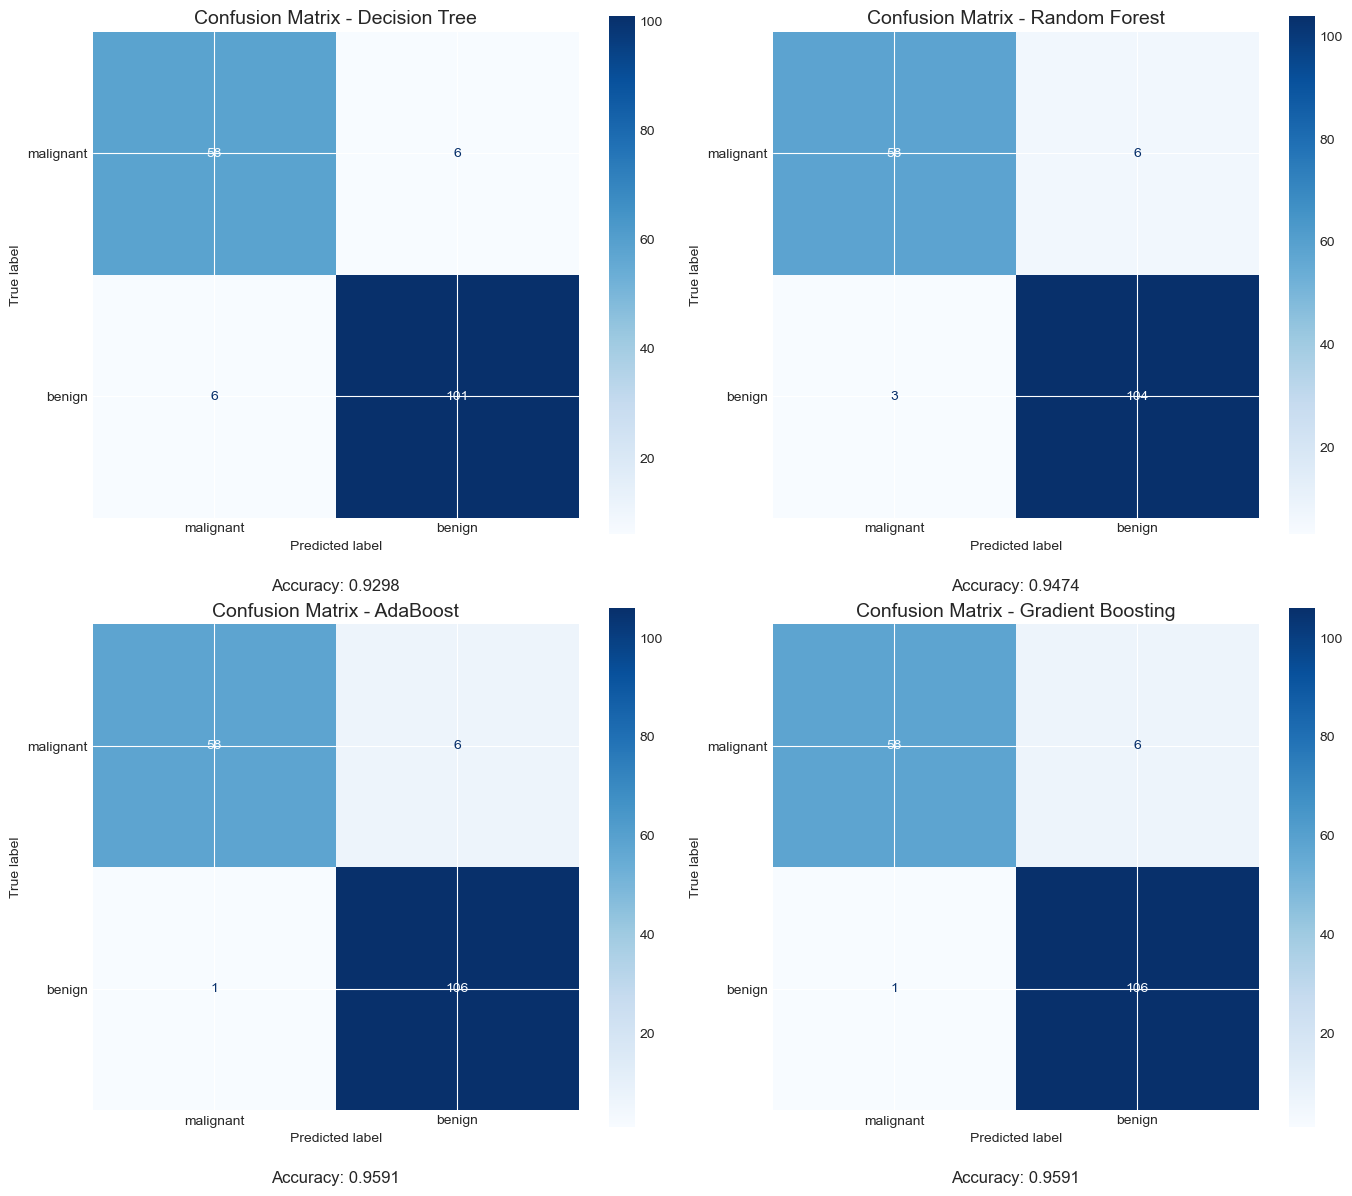

In [21]:
models = {
    'Decision Tree': (dt_model, y_pred_dt),
    'Random Forest': (rf_model, y_pred_rf),
    'AdaBoost': (ab_model, y_pred_ab),
    'Gradient Boosting': (gb_model, y_pred_gb)
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (name, (model, y_pred)) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'Confusion Matrix - {name}', fontsize=14)
    
    accuracy = accuracy_score(y_test, y_pred)
    axes[idx].text(0.5, -0.15, f'Accuracy: {accuracy:.4f}', 
                   transform=axes[idx].transAxes, ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Determining Best Model for Each Metric

In [22]:
best_accuracy_model = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
best_precision_model = comparison_df.loc[comparison_df['Precision'].idxmax(), 'Model']
best_recall_model = comparison_df.loc[comparison_df['Recall'].idxmax(), 'Model']
best_f1_model = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']

print(f"Best Accuracy:  {best_accuracy_model} ({comparison_df['Accuracy'].max():.4f})")
print(f"Best Precision: {best_precision_model} ({comparison_df['Precision'].max():.4f})")
print(f"Best Recall:    {best_recall_model} ({comparison_df['Recall'].max():.4f})")
print(f"Best F1-Score:  {best_f1_model} ({comparison_df['F1-Score'].max():.4f})")

overall_best_model = best_f1_model
print(f"\nOverall Best Model (based on F1-Score): {overall_best_model}")

Best Accuracy:  AdaBoost (0.9591)
Best Precision: AdaBoost (0.9464)
Best Recall:    AdaBoost (0.9907)
Best F1-Score:  AdaBoost (0.9680)

Overall Best Model (based on F1-Score): AdaBoost


# Feature Importance Analysis

In [23]:
feature_importance_dt = dt_model.feature_importances_
feature_importance_rf = rf_model.feature_importances_
feature_importance_gb = gb_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': feature_importance_dt,
    'Random Forest': feature_importance_rf,
    'Gradient Boosting': feature_importance_gb
})

for col in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    importance_df[col] = importance_df[col] / importance_df[col].sum()

importance_df = importance_df.sort_values('Random Forest', ascending=False)

print("\nTop 10 Important Features based on Random Forest:")
print(importance_df[['Feature', 'Random Forest']].head(10).to_string(index=False))


Top 10 Important Features based on Random Forest:
             Feature  Random Forest
          worst area       0.144676
     worst perimeter       0.140062
worst concave points       0.126091
        worst radius       0.082656
 mean concave points       0.080412
         mean radius       0.069293
      mean perimeter       0.052875
           mean area       0.044947
      mean concavity       0.040225
     worst concavity       0.038598


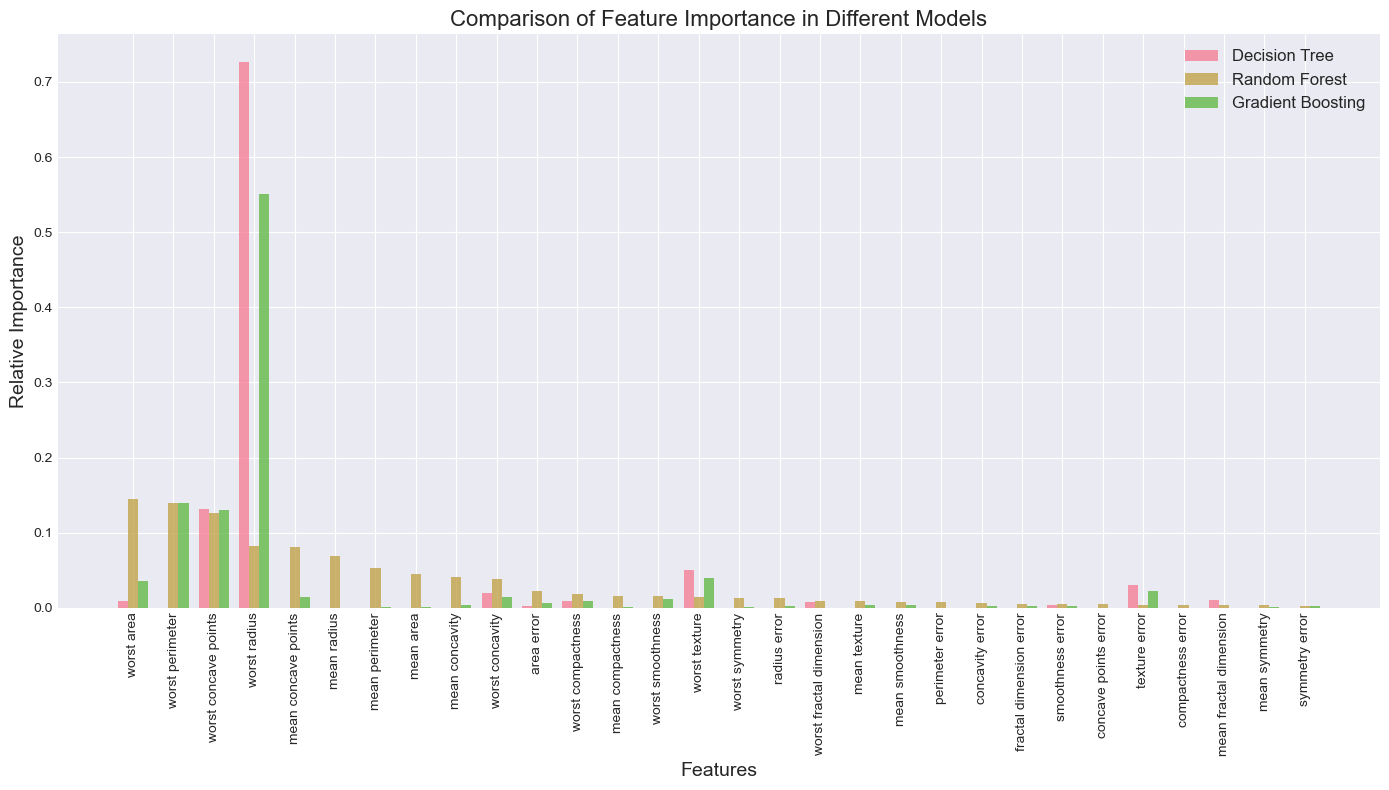

In [24]:
plt.figure(figsize=(14, 8))
x = np.arange(len(feature_names))
width = 0.25

plt.bar(x - width, importance_df['Decision Tree'].values, width, label='Decision Tree', alpha=0.7)
plt.bar(x, importance_df['Random Forest'].values, width, label='Random Forest', alpha=0.7)
plt.bar(x + width, importance_df['Gradient Boosting'].values, width, label='Gradient Boosting', alpha=0.7)

plt.xlabel('Features', fontsize=14)
plt.ylabel('Relative Importance', fontsize=14)
plt.title('Comparison of Feature Importance in Different Models', fontsize=16)
plt.xticks(x, importance_df['Feature'].values, rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Visualizing The Effect of Tree Depth on Decision Tree Performance 

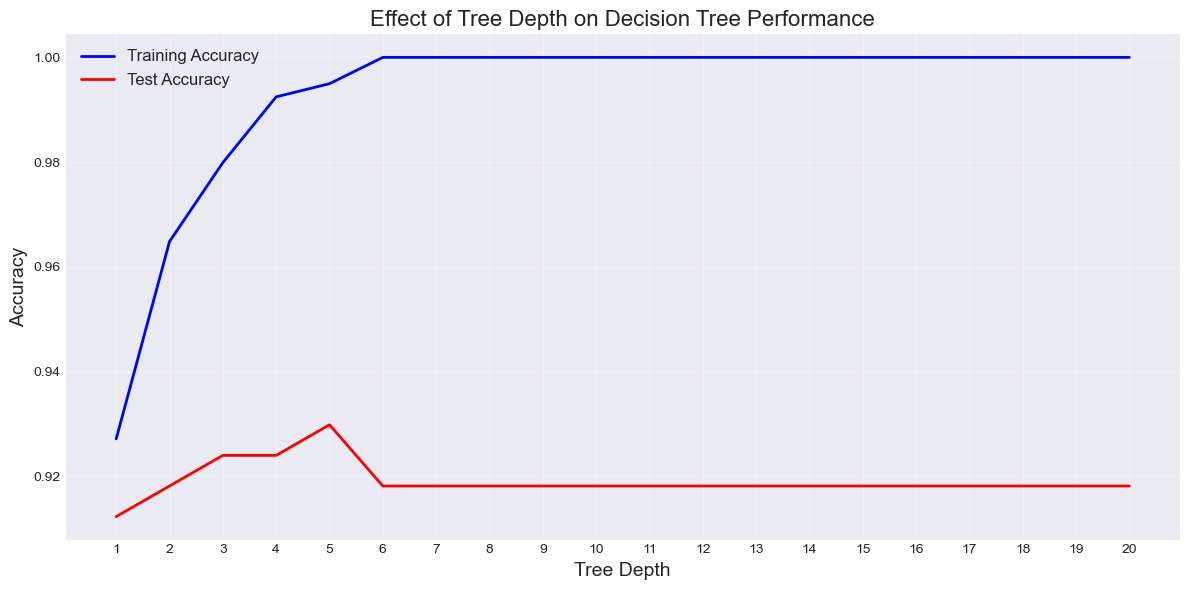

In [25]:
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    
    y_train_pred = dt.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)
    
    y_test_pred = dt.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_accuracies, 'r-', label='Test Accuracy', linewidth=2)
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Effect of Tree Depth on Decision Tree Performance', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.tight_layout()
plt.show()

In [26]:
optimal_depth = depths[test_accuracies.index(max(test_accuracies))]
print(f"\nOptimal tree depth for Decision Tree: {optimal_depth}")
print(f"Training accuracy at depth {optimal_depth}: {train_accuracies[optimal_depth-1]:.4f}")
print(f"Test accuracy at depth {optimal_depth}: {test_accuracies[optimal_depth-1]:.4f}")


Optimal tree depth for Decision Tree: 5
Training accuracy at depth 5: 0.9950
Test accuracy at depth 5: 0.9298
